## Neceassy Imports

In [23]:
import os
import numpy as np
import cv2

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Dropout
from keras.regularizers import l2
from keras.regularizers import l1
import tensorflow as tf


from sklearn.utils import shuffle
from PIL import Image
from tensorflow.keras import regularizers

## Loading the data

In [24]:
# Replace 'your_directory_path' with the path to your directory
directory_path = 'F:/Coding stuff/grpPRJ/demo/dataset/HandGesture/images'

# List all subdirectories using os.listdir()
subfolders = [f.name for f in os.scandir(directory_path) if f.is_dir()]

# Print the list of subfolder names
print(subfolders)


['okay', 'paper', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']


In [25]:
labels = subfolders
y_train = []
x_train = []
path = directory_path
for i in os.listdir(path):
    for j in os.listdir(path + "/" + i):
        im =  Image.open(path + "/" + i + '/' + j)
        im = im.resize((240,200),Image.ANTIALIAS)
        im = np.array(im)
        im = np.expand_dims(im,axis = 2)
        x_train.append(im)
        y_train.append(labels.index(i))

In [26]:
x = np.array(x_train)
y = to_categorical(y_train)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.80, random_state = 42)

In [27]:
print(x.shape)
print(y.shape)

# (5243, 200, 240, 1)
# (5243, 10)

(3686, 200, 240, 1)
(3686, 7)


## Model construction and training

In [28]:
model = Sequential()
model.add(Conv2D(16, kernel_size = 5, activation = 'relu', input_shape = (200,240,1)))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(32, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(64, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(128, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(32,activation = 'relu',kernel_regularizer = regularizers.l1_l2(l1 = 0.05,l2 = 0.5), bias_regularizer=l2(0.1)))
model.add(Dense(7, activation = 'softmax',kernel_regularizer = regularizers.l1_l2(l1 = 0.05, l2 = 0.5), bias_regularizer=l2(0.1)))


In [29]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 236, 16)      1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 118, 16)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 114, 32)       12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 57, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 43, 53, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 21, 26, 64)      

In [30]:
logdir='logs'
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs')

In [31]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=64, callbacks=[tensorboard_callback])

Epoch 1/50


ValueError: in user code:

    File "f:\anaconda\anaconda\envs\myenv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "f:\anaconda\anaconda\envs\myenv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "f:\anaconda\anaconda\envs\myenv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "f:\anaconda\anaconda\envs\myenv\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "f:\anaconda\anaconda\envs\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "f:\anaconda\anaconda\envs\myenv\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "conv2d_4" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 200, 240, 1)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 200, 240, 1), dtype=uint8)
      • training=True
      • mask=None


In [ ]:
import matplotlib.pyplot as plt

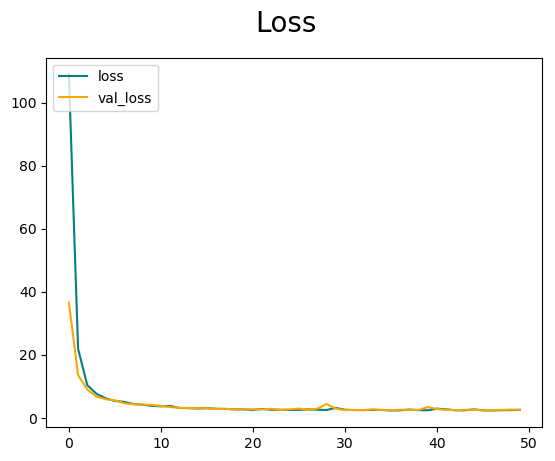

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

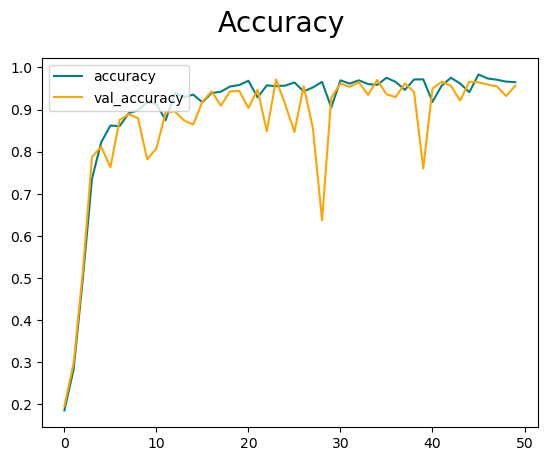

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# model.save('emojirecog.hdf5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('F:/Coding stuff/grpPRJ/demo/best.h5')

In [44]:
model = tf.keras.models.load_model('F:/Coding stuff/grpPRJ/demo/best.h5')

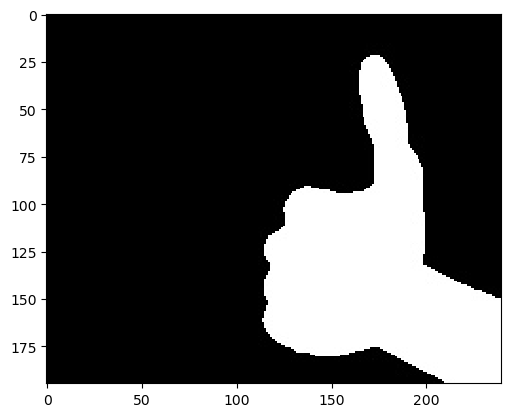

In [67]:
img = cv2.imread('F:/Coding stuff/grpPRJ/demo/test/thumb.jpg')
plt.imshow(img)
plt.show()

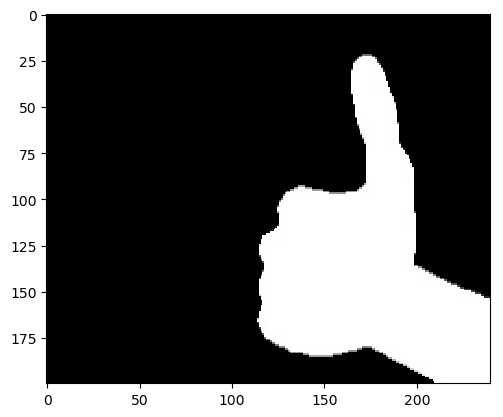

In [68]:
resize = tf.image.resize(img, (200,240))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
# Assuming 'image' is your EagerTensor with shape (None, 200, 240, 3)
grayscale_image = tf.image.rgb_to_grayscale(resize)


In [70]:
yhat = model.predict(np.expand_dims(grayscale_image, 0))
yhat
max_position = np.argmax(yhat)
labels[max_position]

1/1 [==============================] - 0s 53ms/step


'thumbs'

In [71]:
len(labels)

7

In [72]:
labels

['okay', 'paper', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']